#Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

## Data Dictionary:

System measures used:

lread - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user memory

scall - Number of system calls of all types per second

sread - Number of system read calls per second
 .
swrite - Number of system write calls per second.

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation.

runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.

Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.

------------------------
usr - Portion of time (%) that cpus run in user mode

#1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

##Importing Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_excel("/content/drive/MyDrive/predictive-modelling/week-4_CART/compactiv.xlsx")

Mounted at /content/drive


##EDA

In [ ]:
# Check top few records to get a feel of the data structure
pd.set_option('display.max_columns', None)
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

**Get Summary Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [ ]:
df.shape

(8192, 22)

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [ ]:
# checking of missing values
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

**Imputing Misiing Values**

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [ ]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.000000,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.000000,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,197385.728363,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,197385.728363,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,197385.728363,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


## unique values for categorical variables


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64




**Univariate analysis**

In [ ]:
numerical_variables = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'usr']
categorical_variables = ['runqsz']

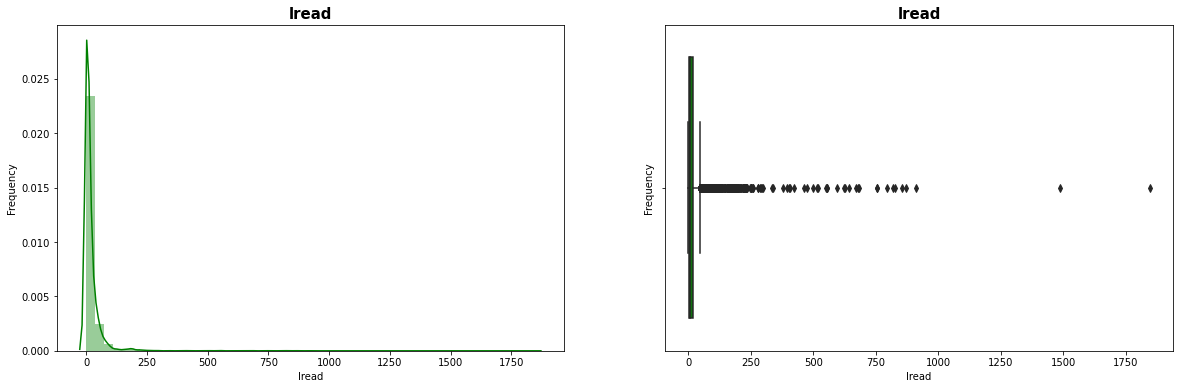

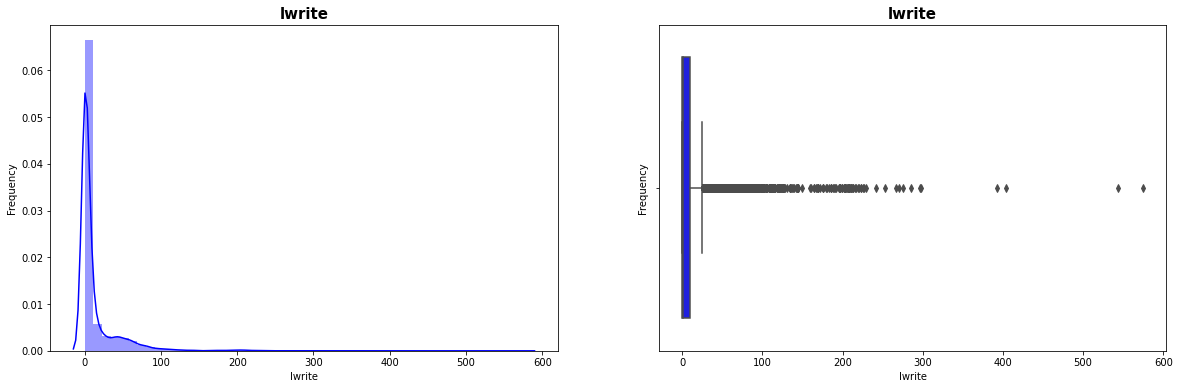

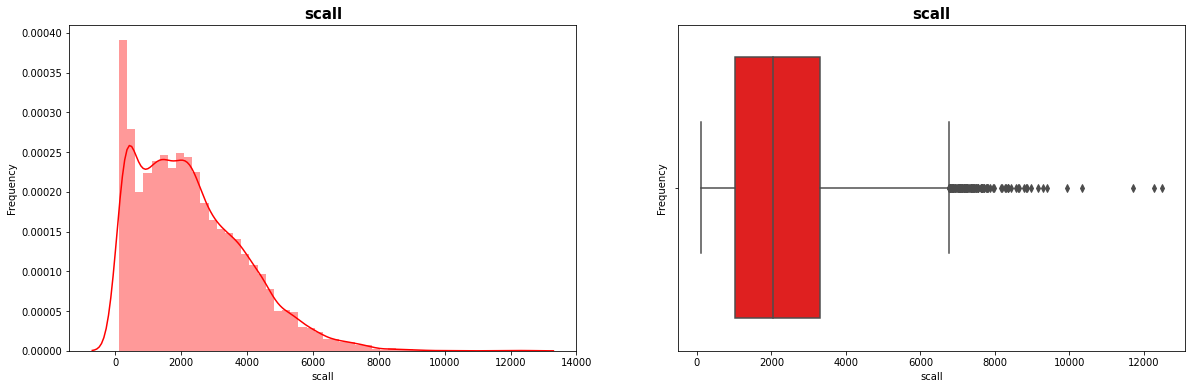

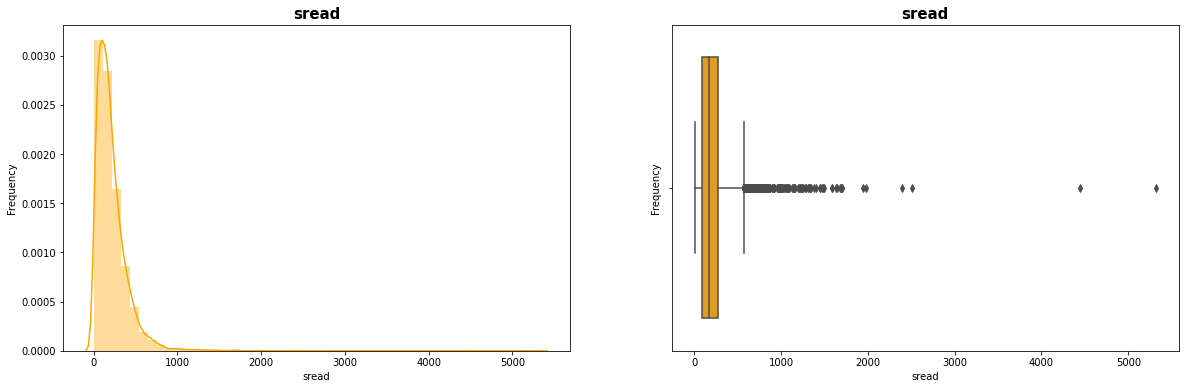

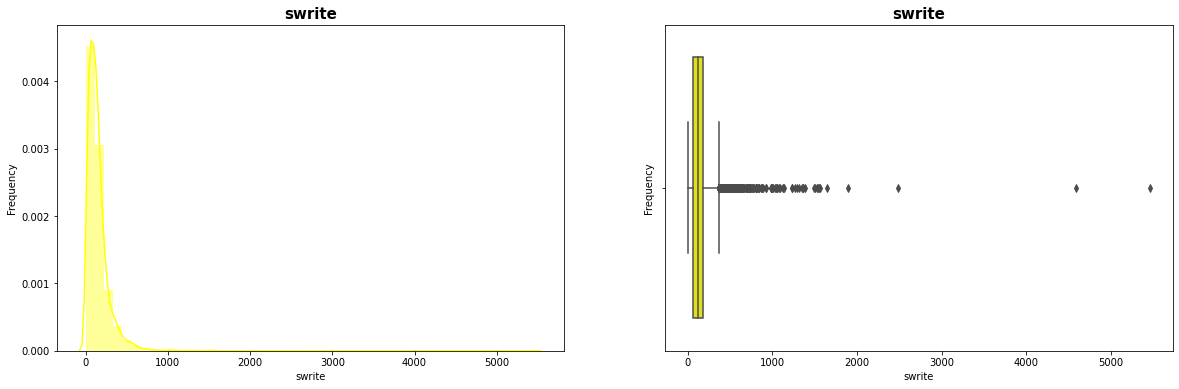

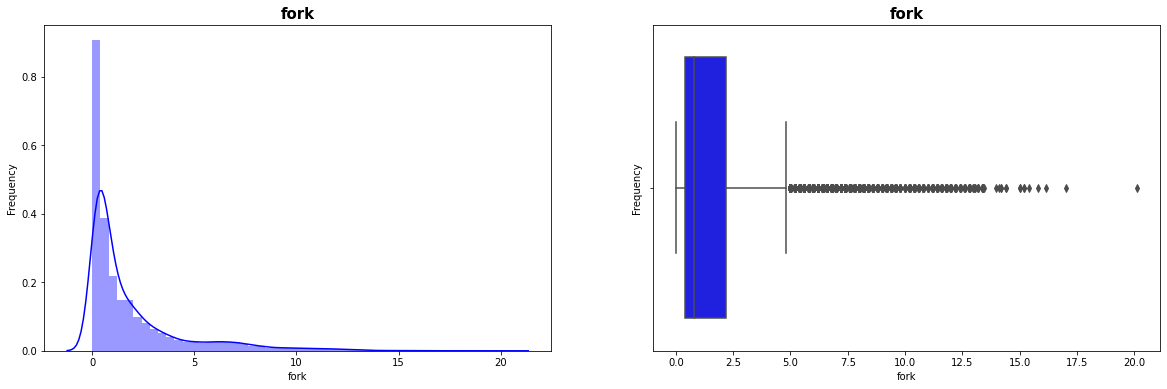

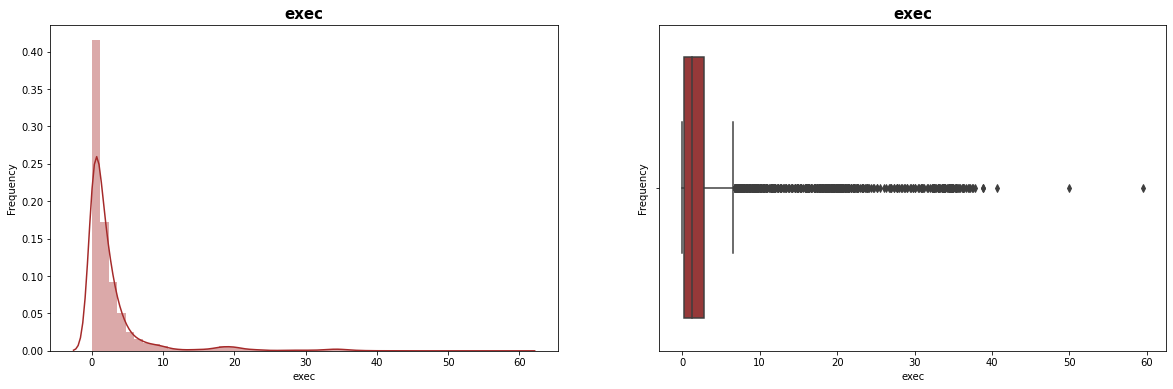

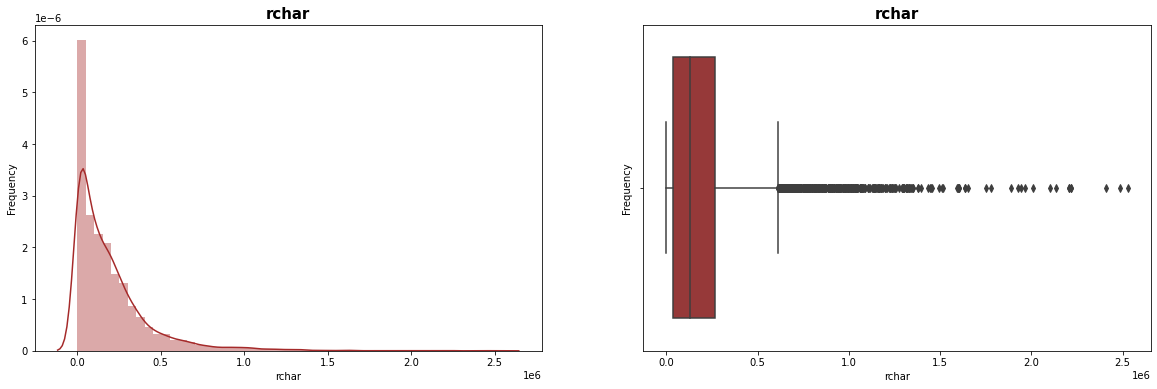

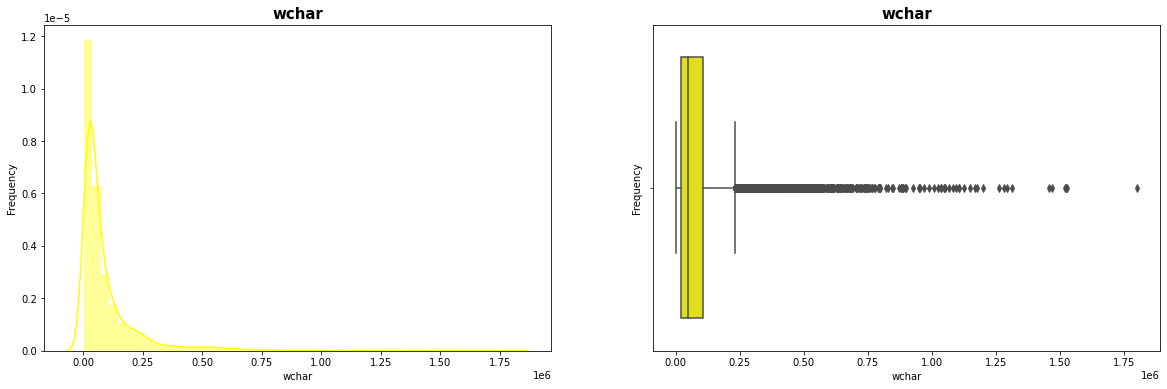

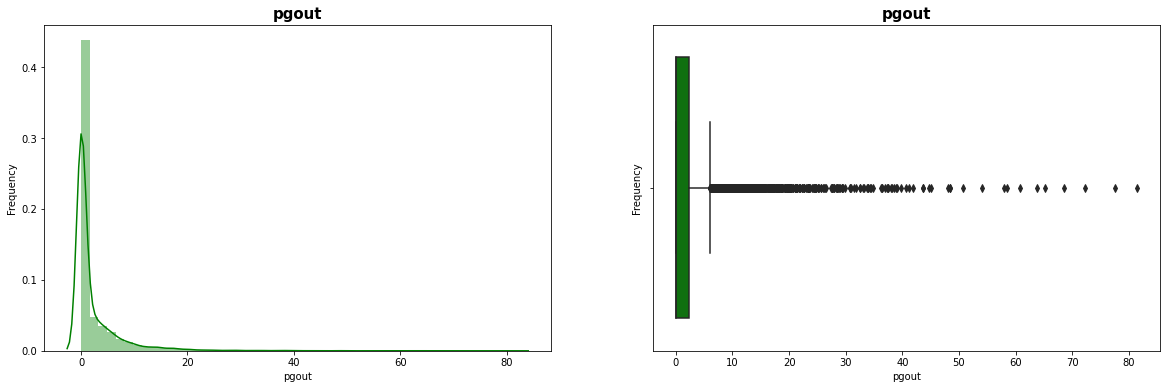

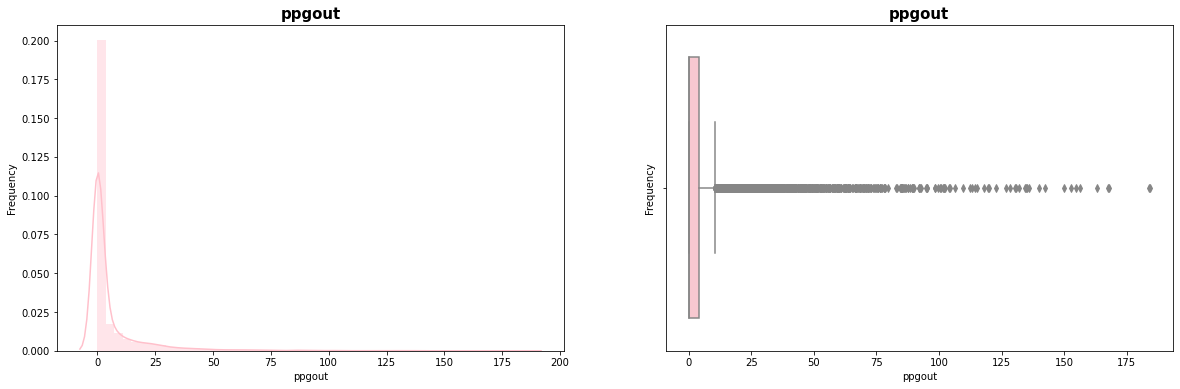

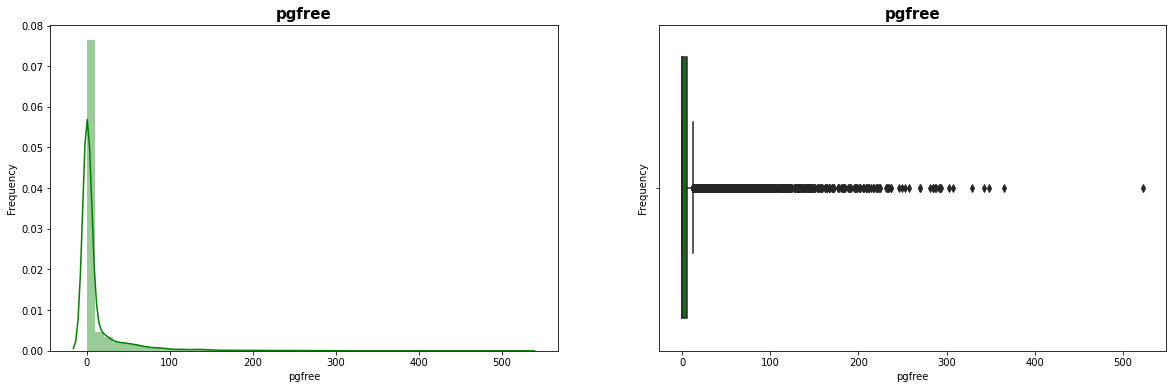

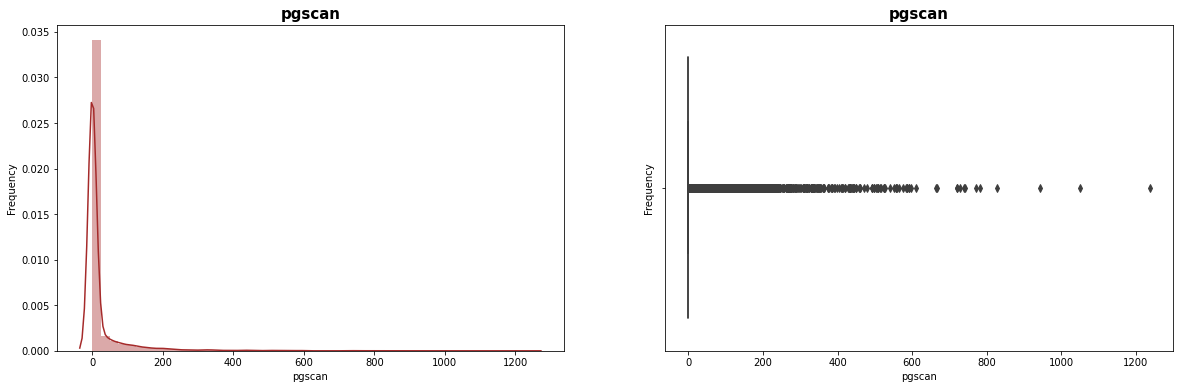

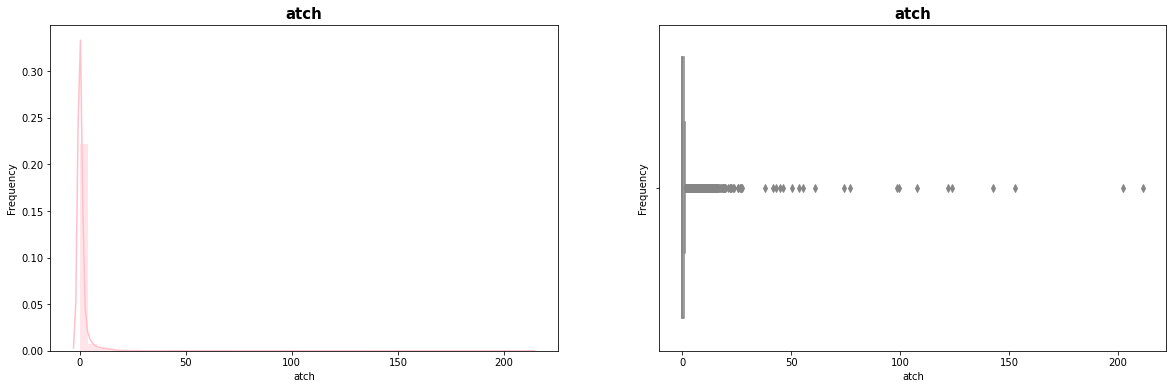

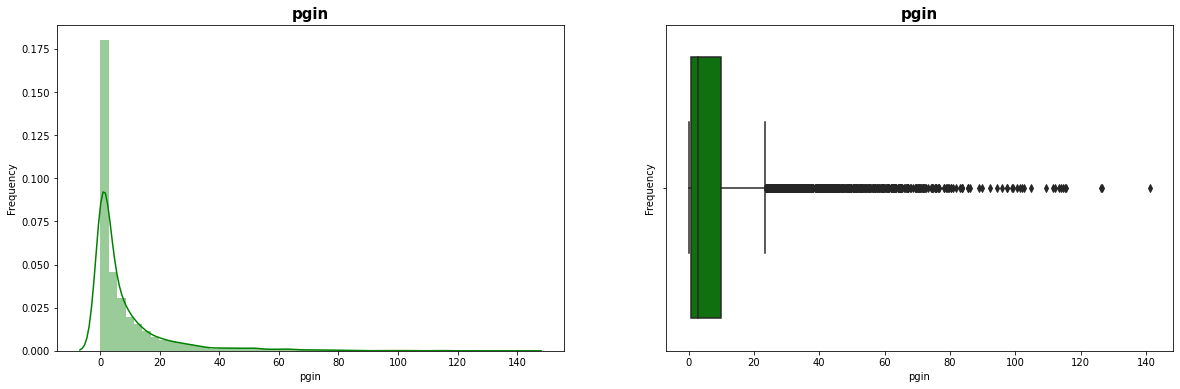

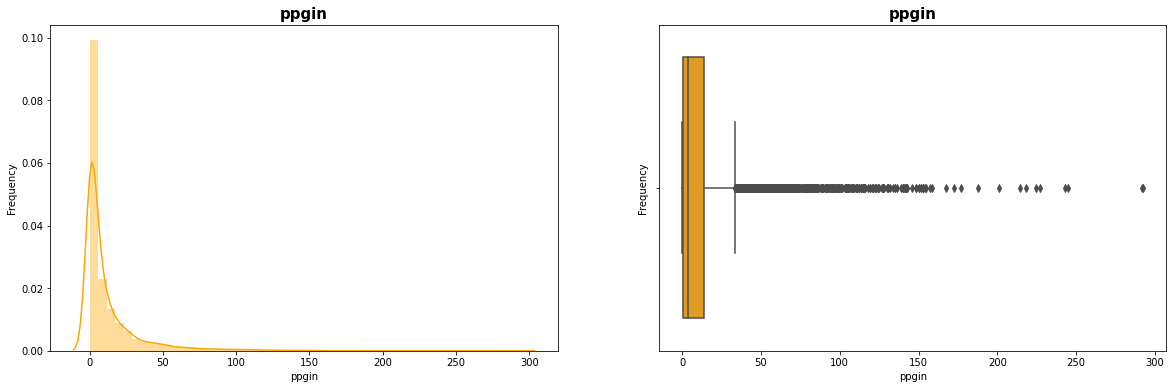

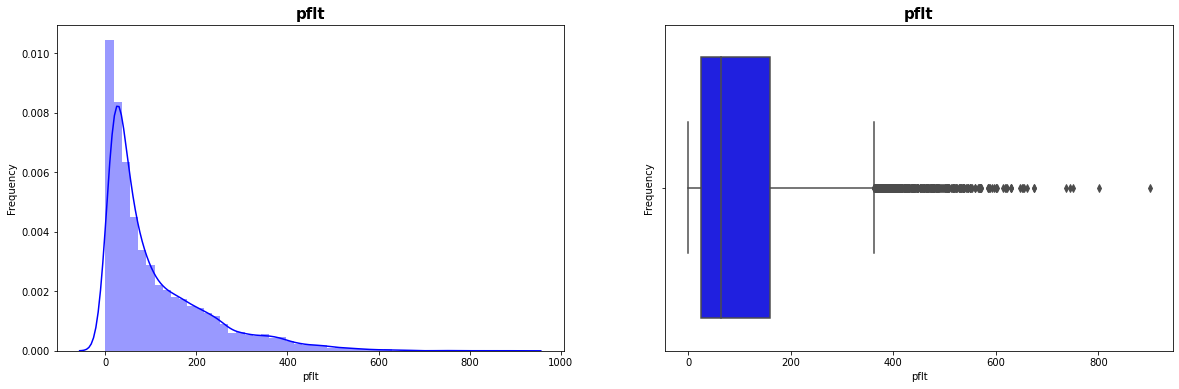

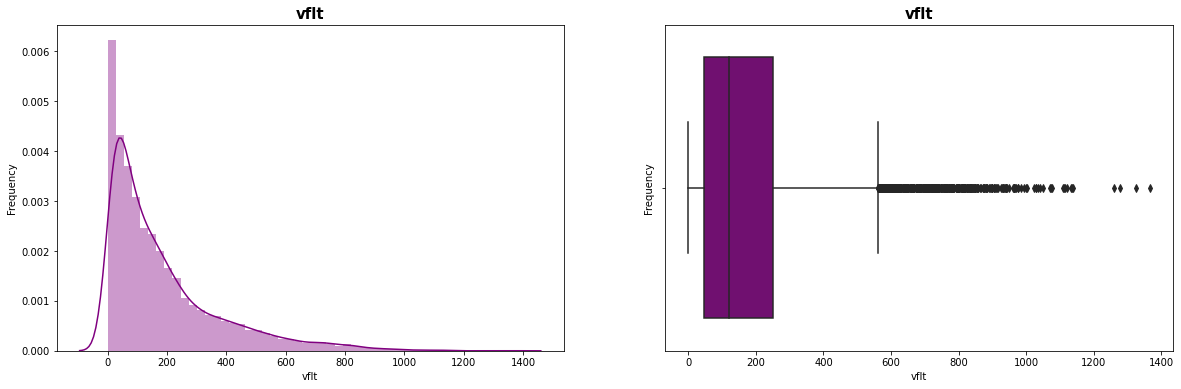

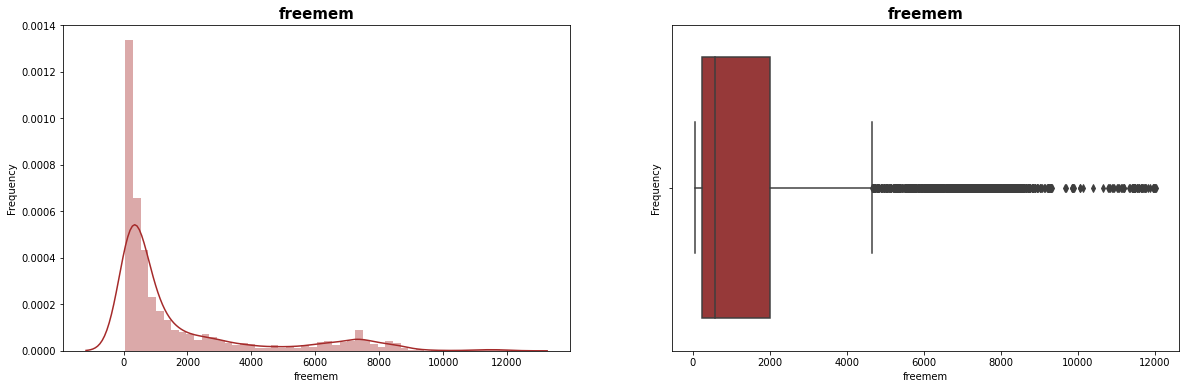

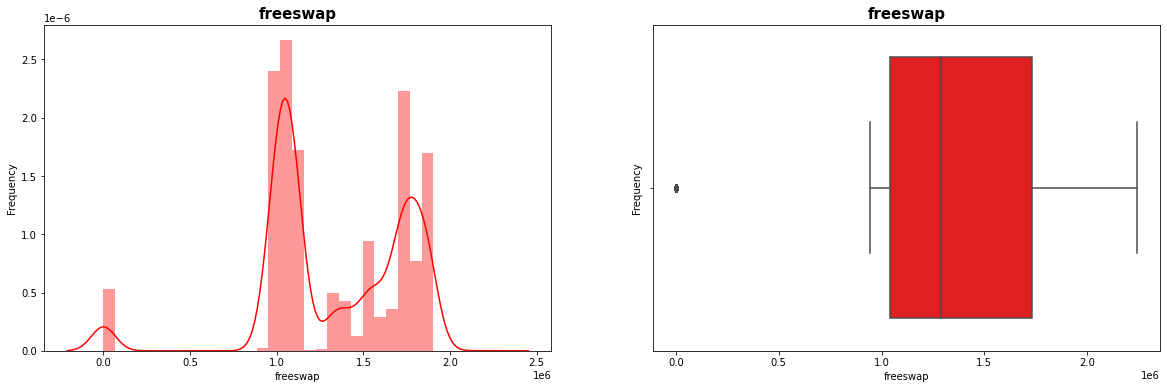

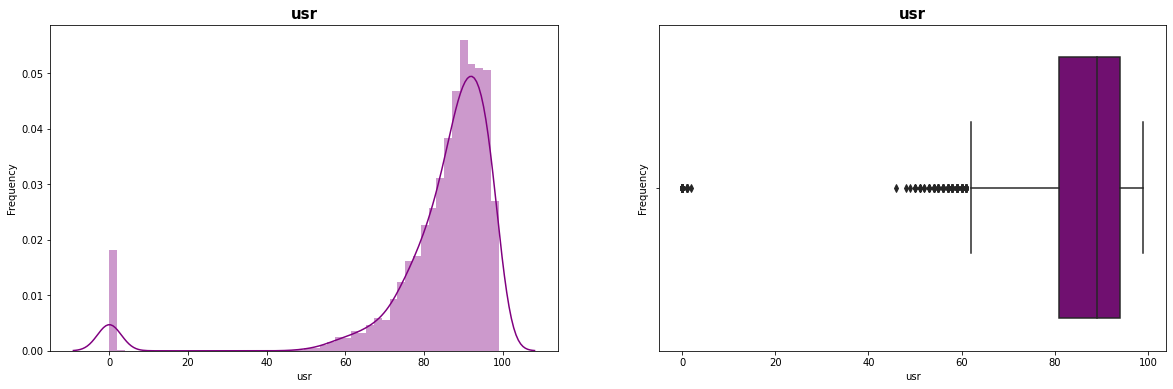

In [ ]:
all_colors: list = [
    "blue",
    "green",
    "yellow",
    "pink",
    "orange",
    "purple",
    "brown",
    "red",
]
import warnings
warnings.filterwarnings("ignore")
for numberic_column in numerical_variables:
    col = np.random.choice(all_colors)
    # variable 1
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.title(numberic_column, fontweight="bold", fontsize=15)
    plt.ylabel("Frequency")
    sns.distplot(df[numberic_column], color=col)

    plt.subplot(1, 2, 2)
    plt.title(numberic_column, fontweight="bold", fontsize=15)
    plt.ylabel("Frequency")
    sns.boxplot(df[numberic_column], orient="vertical", color=col)
plt.show()   

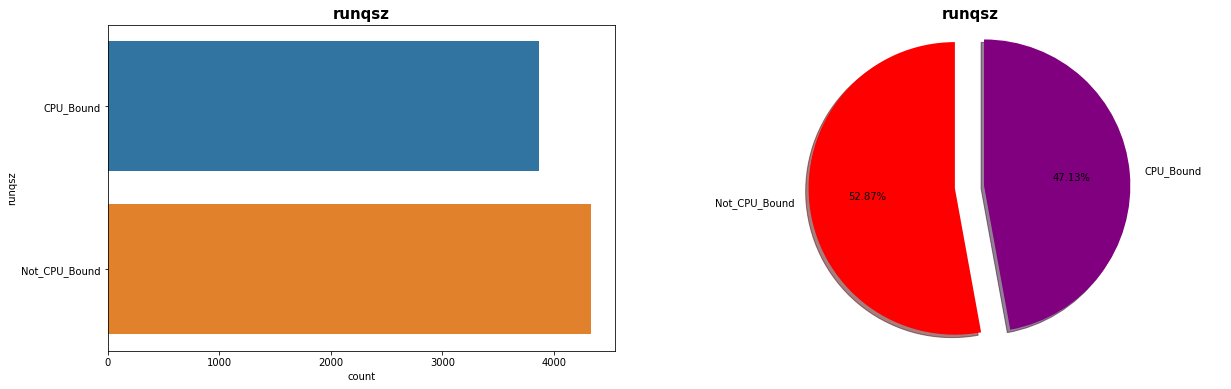

In [ ]:
for category_variable in categorical_variables:
    # fig 1
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.title(category_variable, fontweight="bold", fontsize=15)
    sns.countplot(y=category_variable, data=df)

    plt.subplot(1, 2, 2)
    plt.title(category_variable, fontweight="bold", fontsize=15)
    explode = []
    colors = []
    for ex in df[category_variable].unique():
        explode.append(0.1)
        colors.append(np.random.choice(all_colors))
    plt.pie(
        df[category_variable].value_counts().reset_index()[category_variable],
        labels=df[category_variable].value_counts().reset_index()["index"],
        colors=colors,
        startangle=90,
        shadow=True,
        explode=tuple(explode),
        autopct="%1.2f%%",
    )
    plt.axis("equal")
plt.show()

**Bivariate Analysis**

In [ ]:
sns.pairplot(data=df);

Output hidden; open in https://colab.research.google.com to view.

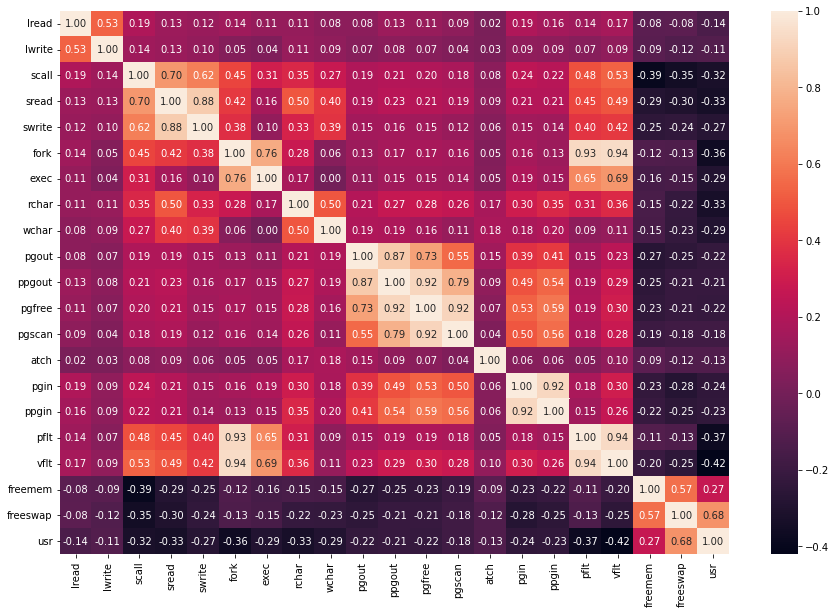

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f');

**Multivariate Analysis**

In [ ]:
for i in numerical_variables:
    for j in numerical_variables:
        if i != j:
            plt.figure(figsize=(20, 6))
            sns.scatterplot(data = df, x = i, y = j, hue = 'runqsz', ci = False);
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Treating Outliers**

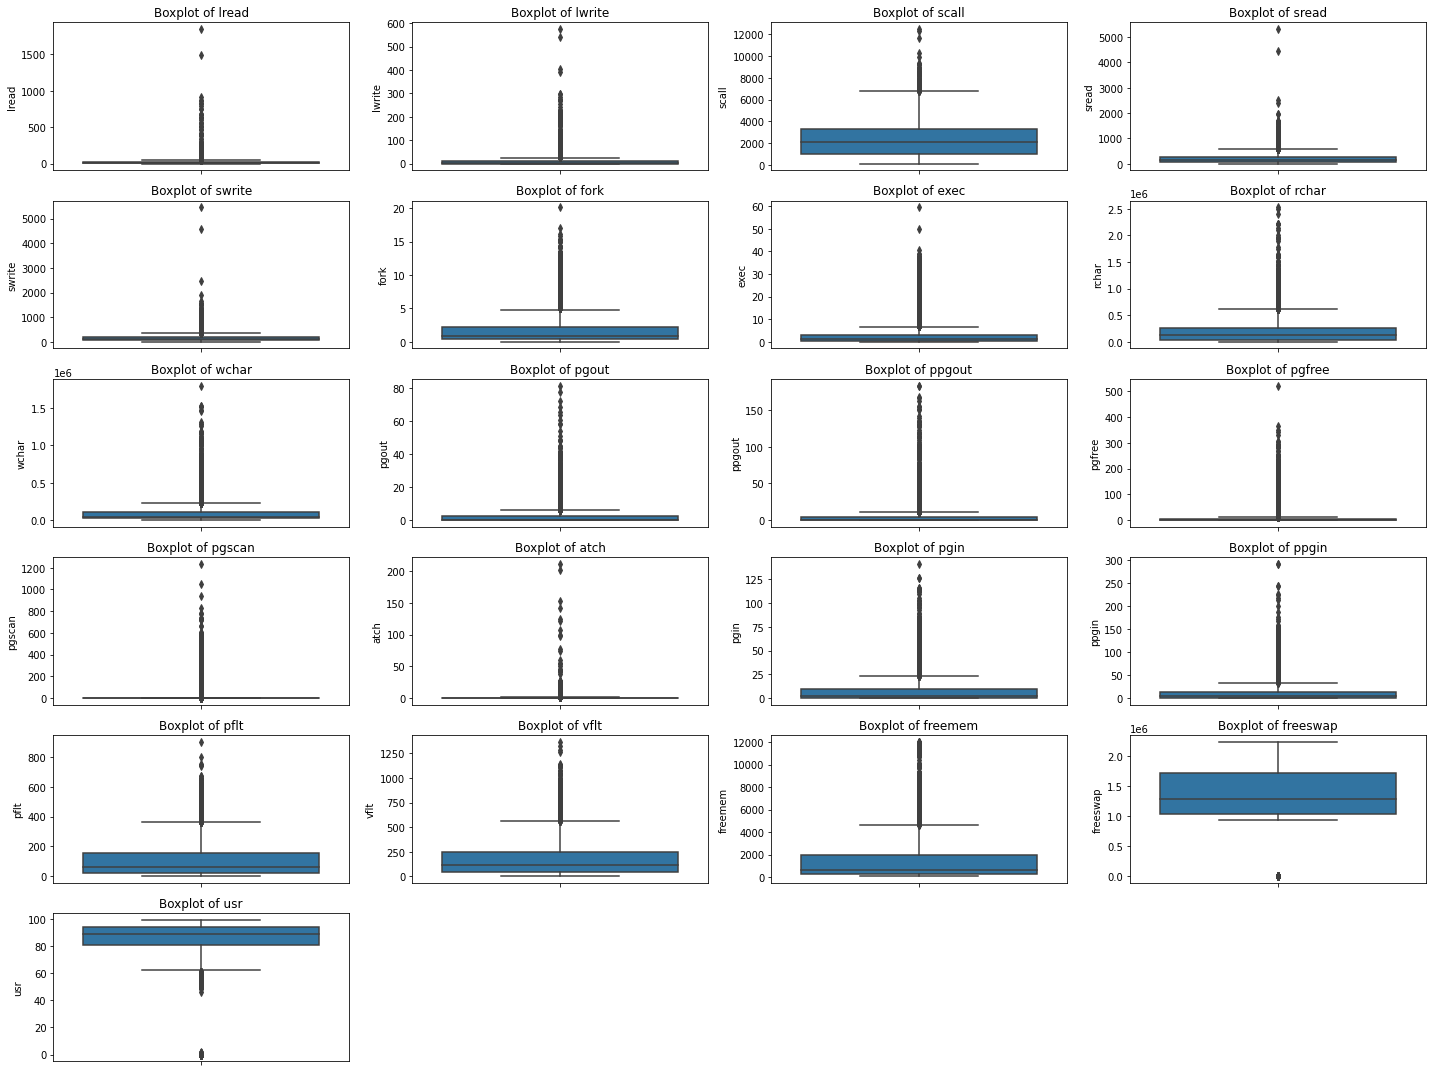

In [ ]:
plt.figure(figsize = (20,15))
feature_list = df[numerical_variables].columns
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df[numerical_variables])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

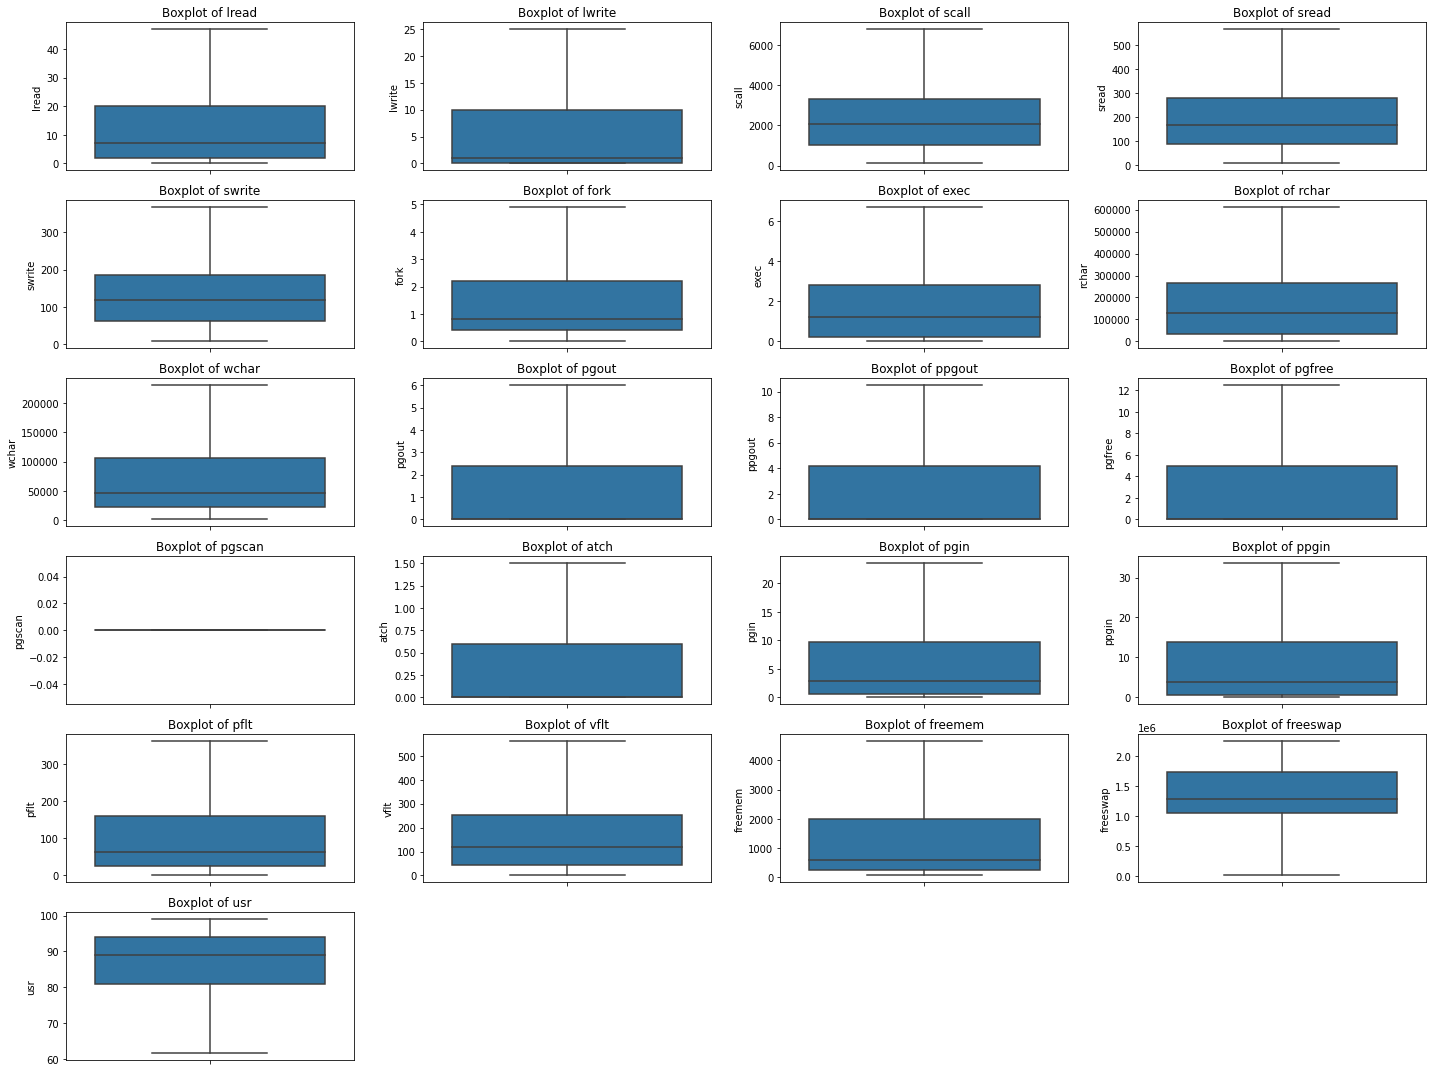

In [ ]:
plt.figure(figsize = (20,15))
feature_list = df[numerical_variables].columns
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df[numerical_variables])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

**Converting categorical to dummy variables**

In [ ]:
df = pd.get_dummies(df, columns=['runqsz'], drop_first=True)

In [ ]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,1


**Checking for Duplicates**

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = df[['usr']]

In [ ]:
X.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,1


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

**Linear Regression Model**

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data - best fit line ( y =Bo+B1x1+---+BnXn)
regression_model =LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [ ]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

The coefficient for lread is -0.0634099731929712
The coefficient for lwrite is 0.04801838613982387
The coefficient for scall is -0.000664352337468163
The coefficient for sread is 0.0003385875789163073
The coefficient for swrite is -0.0054598818142991765
The coefficient for fork is 0.0296329957065836
The coefficient for exec is -0.3210632504852232
The coefficient for rchar is -5.2118791560622275e-06
The coefficient for wchar is -5.346335455397222e-06
The coefficient for pgout is -0.3668522981358798
The coefficient for ppgout is -0.07860920074522432
The coefficient for pgfree is 0.08525820125741179
The coefficient for pgscan is 4.440892098500626e-16
The coefficient for atch is 0.6304380351240503
The coefficient for pgin is 0.01975385591267015
The coefficient for ppgin is -0.06715372112646986
The coefficient for pflt is -0.03359198966258064
The coefficient for vflt is -0.005464921751511641
The coefficient for freemem is -0.0004576614008076046
The coefficient for freeswap is 8.829320420421

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 84.13143842097666


In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

0.7961565330395103

79.6% of the variation in the usr(Portion of time (%) that cpus run in user mode) is explained by the predictors in the model for train set.



In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7676695029858434

In [ ]:
#RMSE on Training data
predic_train =regression_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predic_train))

4.419016675543094

In [ ]:
#RMSE on Testing data
predic_test =regression_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predic_test))

4.652920160995879

**Linear Regression using statsmodels**

In [ ]:
# concatenate X and y into a single dataframe
data_train =pd.concat([X_train, y_train], axis=1)
data_test =pd.concat([X_test, y_test], axis=1)
data_train.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound,usr
694,1.0,1.0,1345.0,223.0,192.0,0.6,0.6,198703.0,230625.875,0.60,6.20,12.50,0.0,1.5,3.80,7.40,28.20,56.60,121.0,1375446.0,0,91.0
5535,1.0,1.0,1429.0,87.0,67.0,0.2,0.2,7163.0,24842.000,0.00,0.00,0.00,0.0,0.0,1.60,1.60,15.77,30.74,1476.0,1021541.0,1,94.0
4244,47.0,25.0,3273.0,225.0,180.0,0.6,0.4,83246.0,53705.000,5.39,7.19,7.19,0.0,1.5,3.99,4.59,59.88,74.05,82.0,10989.5,0,61.5
2472,13.0,8.0,4349.0,300.0,191.0,2.8,3.0,96009.0,70467.000,0.00,0.00,0.00,0.0,0.0,2.80,3.20,129.00,236.80,772.0,993909.0,0,83.0
7052,17.0,23.0,225.0,13.0,13.0,0.4,1.6,17132.0,12514.000,0.00,0.00,0.00,0.0,0.0,0.00,0.00,19.80,23.80,4179.0,1821682.0,1,94.0


In [ ]:
expr= 'usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin + pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data=data_train).fit()
lm1.params

Intercept               8.413144e+01
lread                  -6.340997e-02
lwrite                  4.801839e-02
scall                  -6.643523e-04
sread                   3.385876e-04
swrite                 -5.459882e-03
fork                    2.963300e-02
exec                   -3.210633e-01
rchar                  -5.211879e-06
wchar                  -5.346335e-06
pgout                  -3.668523e-01
ppgout                 -7.860920e-02
pgfree                  8.525820e-02
pgscan                  5.543093e-15
atch                    6.304380e-01
pgin                    1.975386e-02
ppgin                  -6.715372e-02
pflt                   -3.359199e-02
vflt                   -5.464922e-03
freemem                -4.576614e-04
freeswap                8.829320e-06
runqsz_Not_CPU_Bound    1.613737e+00
dtype: float64

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:48:01   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               84.1314 

In [ ]:
# Calculate MSE,   ( y^  - y )2
mse =np.mean((lm1.predict(data_train.drop('usr', axis=1))-data_train['usr'])**2)
mse

19.527708378727944

In [ ]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

4.419016675543094

In [ ]:
np.sqrt(lm1.mse_resid) #another way

4.42713099621273

In [ ]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

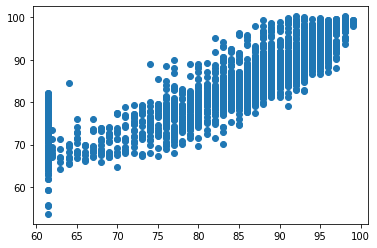

In [ ]:
plt.scatter(y_test['usr'], y_pred)
plt.show()

In [ ]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(84.13) * Intercept + (-0.06) * lread + (0.05) * lwrite + (-0.0) * scall + (0.0) * sread + (-0.01) * swrite + (0.03) * fork + (-0.32) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.37) * pgout + (-0.08) * ppgout + (0.09) * pgfree + (0.0) * pgscan + (0.63) * atch + (0.02) * pgin + (-0.07) * ppgin + (-0.03) * pflt + (-0.01) * vflt + (-0.0) * freemem + (0.0) * freeswap + (1.61) * runqsz_Not_CPU_Bound + 

##1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

**Conclusion**

The final Linear Regression equation is:

**usr = b0 + b1 * lread + b2 * lwrite + b3 * scall + b4 * sread + b5 * swrite + b6 * fork + b7 * exec + b8 * rchar + b9 * wchar + b10 * pgout + b11 * ppgout + b12 * pgfree + b13 * pgscan + b14 * atch + b15 * pgin + b16 * ppgin + b17* pflt + b18* vflt + b19* freemem + b20* freeswap +b21* runqsz_Not_CPU_Bound**

**usr=(84.13) * Intercept + (-0.06) * lread + (0.05) * lwrite + (-0.0) * scall + (0.0) * sread + (-0.01) * swrite + (0.03) * fork + (-0.32) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.37) * pgout + (-0.08) * ppgout + (0.09) * pgfree + (0.0) * pgscan + (0.63) * atch + (0.02) * pgin + (-0.07) * ppgin + (-0.03) * pflt + (-0.01) * vflt + (-0.0) * freemem + (0.0) * freeswap + (1.61) * runqsz_Not_CPU_Bound**

When lwrite increases by 1 unit, usr increases by 0.05 units keeping all other predictors constant.
similarly, when fork increases  by 1 unit, usr increases by 0.03 units keeping all other predictors constant.

There are also some negative co-efficient values, for instance, lread has negative coefficient which means that when lread(Reads (transfers per second ) between system memory and user memory) the usr descreases by -0.06 units.

_________________________________________________________________________

#Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

## Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

#2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
data_df = pd.read_excel("/content/drive/MyDrive/predictive-modelling/week-4_CART/Contraceptive_method_dataset.xlsx")

Mounted at /content/drive


#EDA

In [ ]:
data_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2.0,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3.0,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3.0,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3.0,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3.0,Low,Exposed,No


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   float64
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(3), object(7)
memory usage: 115.2+ KB


We can see that there are missing values in the dataset.

In [ ]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f'Percentage of data present after excluding NA s {data_df.dropna().shape[0]/data_df.shape[0]}')
print(f'Number of recorded missing values are {data_df.shape[0] - data_df.dropna().shape[0]}')

Percentage of data present after excluding NA s 0.9375424304141209
Number of recorded missing values are 92


In [ ]:
data_df=data_df.dropna()

In [ ]:
data_df.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [ ]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data_df.shape)

Number of duplicate rows = 76
(1381, 10)


In [ ]:
#removing the duplicates
data_df.drop_duplicates(inplace=True)

In [ ]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data_df.shape)

Number of duplicate rows = 0
(1305, 10)


**Univariate Analysis**

In [ ]:
numerical_variables = ['Wife_age', 'No_of_children_born', 'Husband_Occupation']
categorical_variables = ['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ', 'Contraceptive_method_used']

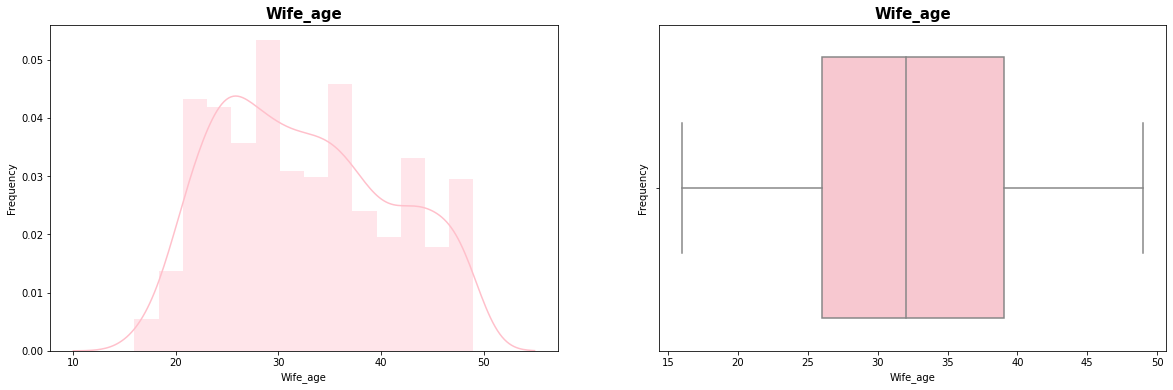

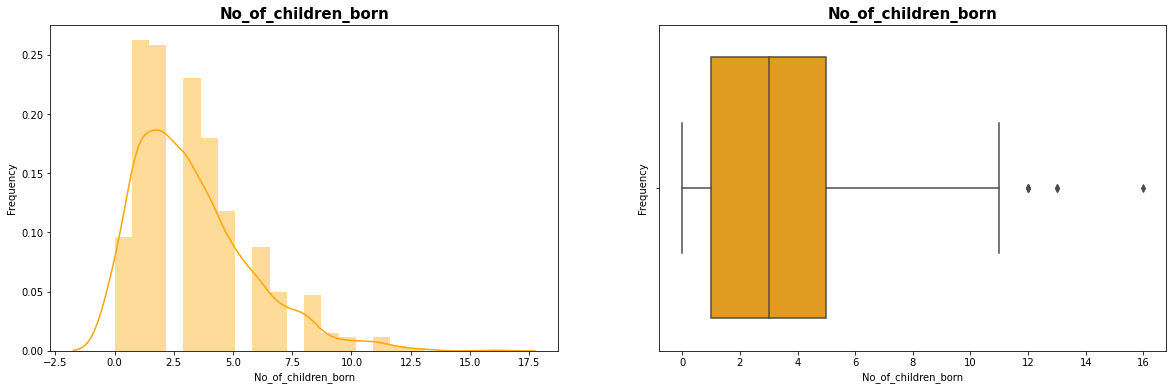

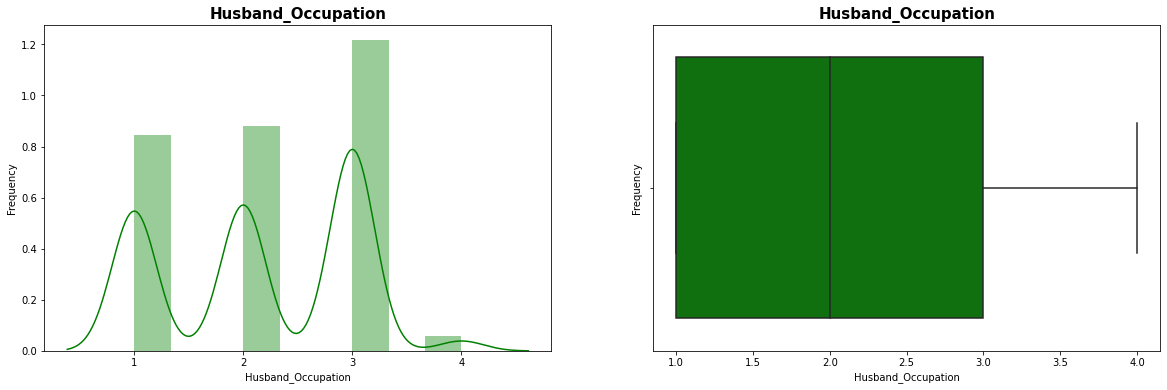

In [ ]:
all_colors: list = [
    "blue",
    "green",
    "yellow",
    "pink",
    "orange",
    "purple",
    "brown",
    "red",
]
import warnings
warnings.filterwarnings("ignore")
for numberic_column in numerical_variables:
    col = np.random.choice(all_colors)
    # variable 1
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.title(numberic_column, fontweight="bold", fontsize=15)
    plt.ylabel("Frequency")
    sns.distplot(data_df[numberic_column], color=col)

    plt.subplot(1, 2, 2)
    plt.title(numberic_column, fontweight="bold", fontsize=15)
    plt.ylabel("Frequency")
    sns.boxplot(data_df[numberic_column], orient="vertical", color=col)
plt.show()   

NameError: ignored

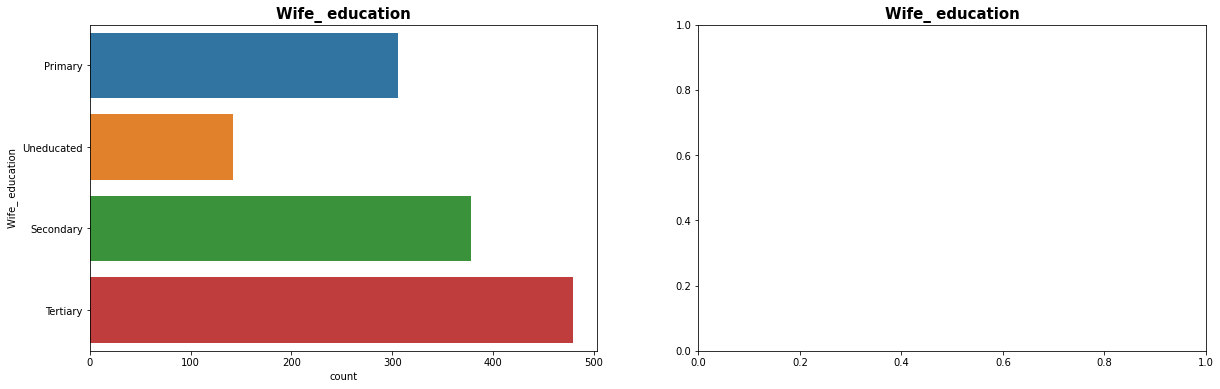

In [ ]:
for category_variable in categorical_variables:
    # fig 1
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.title(category_variable, fontweight="bold", fontsize=15)
    sns.countplot(y=category_variable, data=data_df)

    plt.subplot(1, 2, 2)
    plt.title(category_variable, fontweight="bold", fontsize=15)
    explode = []
    colors = []
    for ex in data_df[category_variable].unique():
        explode.append(0.1)
        colors.append(np.random.choice(all_colors))
    plt.pie(
        data_df[category_variable].value_counts().reset_index()[category_variable],
        labels=data_df[category_variable].value_counts().reset_index()["index"],
        colors=colors,
        startangle=90,
        shadow=True,
        explode=tuple(explode),
        autopct="%1.2f%%",
    )
    plt.axis("equal")
plt.show()

**Bivariate Analysis**

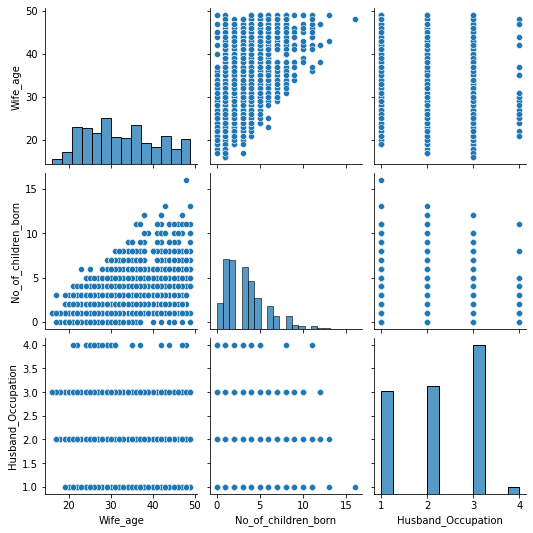

In [ ]:
sns.pairplot(data=data_df)

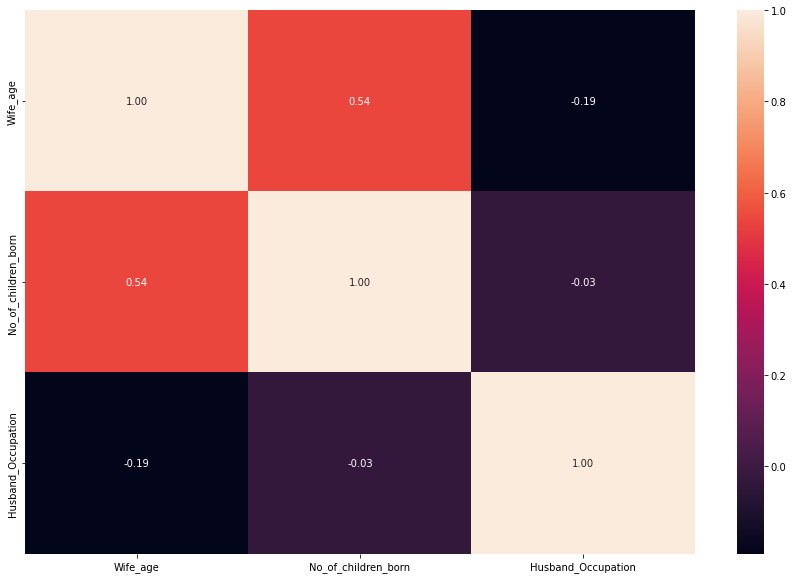

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data_df.corr(), annot = True, fmt = '.2f');

**Multivariate Analysis**

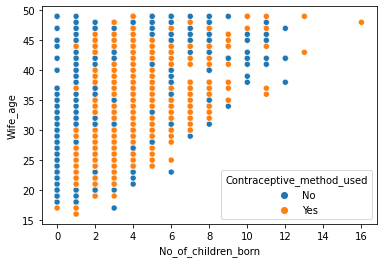

In [ ]:
sns.scatterplot(data = data_df, x = 'No_of_children_born', y = 'Wife_age', hue = 'Contraceptive_method_used', ci = False);

<Figure size 1440x1800 with 0 Axes>

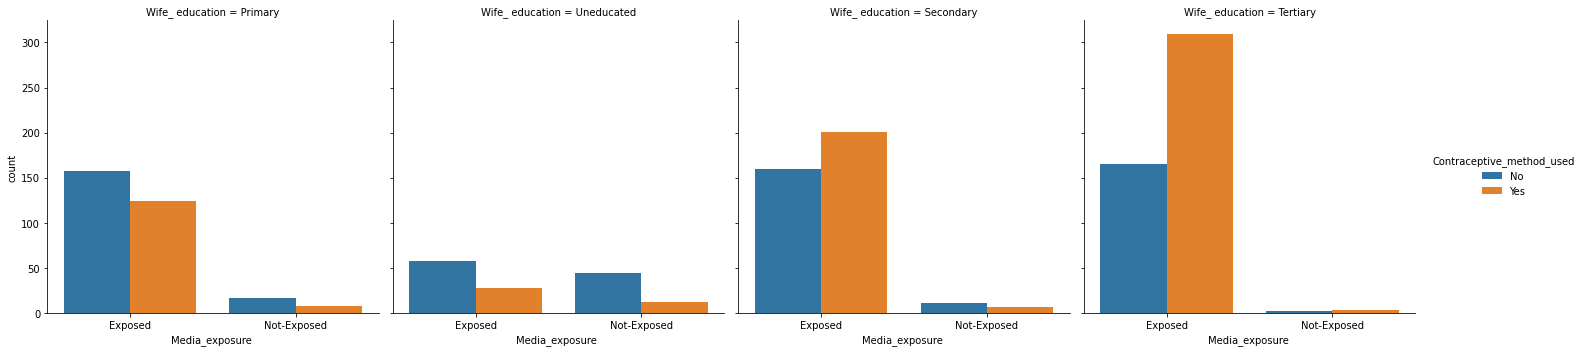

In [ ]:
plt.figure(figsize=(20,25))
sns.catplot(data= data_df, x="Media_exposure ", kind="count",hue = "Contraceptive_method_used", col="Wife_ education");
plt.show()

<Figure size 1440x1800 with 0 Axes>

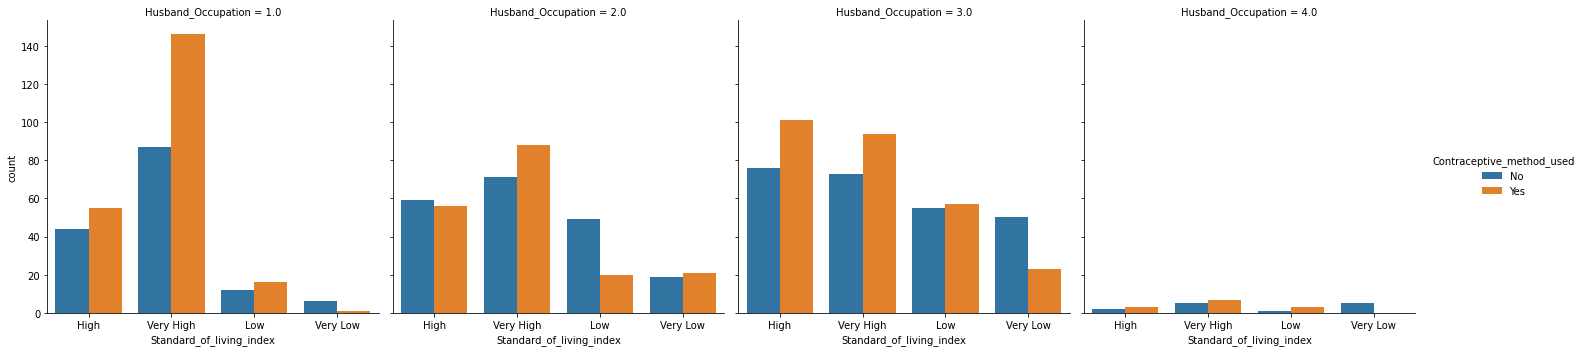

In [ ]:
plt.figure(figsize=(20,25))
sns.catplot(data= data_df, x="Standard_of_living_index", kind="count",hue = "Contraceptive_method_used", col="Husband_Occupation");
plt.show()

<Figure size 1440x1800 with 0 Axes>

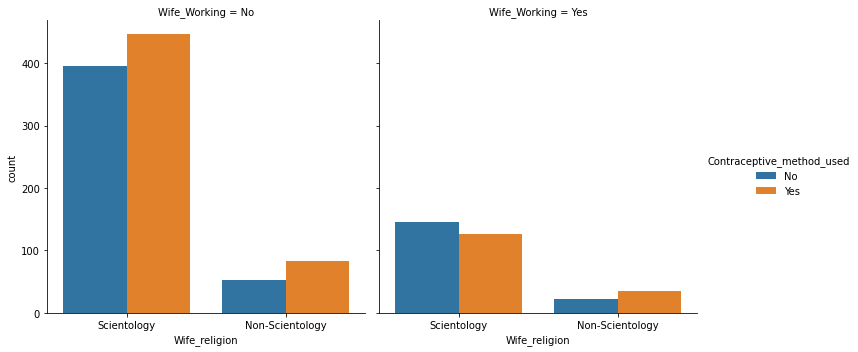

In [ ]:
plt.figure(figsize=(20,25))
sns.catplot(data= data_df, x="Wife_religion", kind="count",hue = "Contraceptive_method_used", col="Wife_Working");
plt.show()

**Outlier Check**

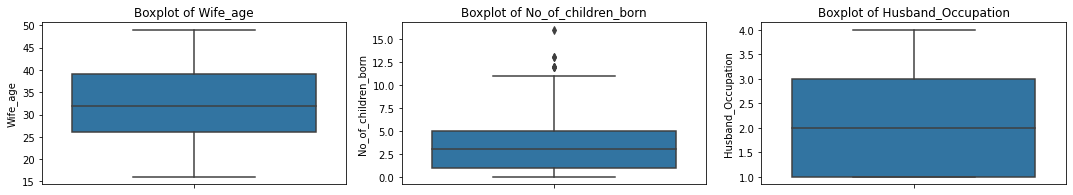

In [ ]:
plt.figure(figsize = (20,15))
feature_list = data_df[numerical_variables].columns
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = data_df[feature_list[i]], data = data_df[numerical_variables])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [ ]:
for i in feature_list:
    LL, UL = remove_outlier(data_df[i])
    data_df[i] = np.where(data_df[i] > UL, UL, data_df[i])
    data_df[i] = np.where(data_df[i] < LL, LL, data_df[i])

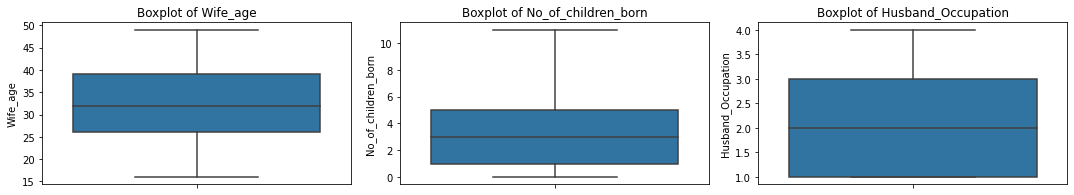

In [ ]:
plt.figure(figsize = (20,15))
feature_list = data_df[numerical_variables].columns
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = data_df[feature_list[i]], data = data_df[numerical_variables])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

**Checking unique values for all objects**

In [ ]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object': 
        print(feature)
        print(data_df[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      479
Secondary     378
Primary       306
Uneducated    142
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      778
Secondary     322
Primary       162
Uneducated     43
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1113
Non-Scientology     192
Name: Wife_religion, dtype: int64


Wife_Working
No     976
Yes    329
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    571
High         396
Low          213
Very Low     125
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1202
Not-Exposed     103
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    691
No     614
Name: Contraceptive_method_used, dtype: int64




##2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

**Data Encoding**

In [ ]:
encode_education = {'Primary': 1, 'Uneducated' : 0, 'Secondary' : 2, 'Tertiary' : 3 }
encode_standard_of_living = {'High' : 0, 'Very High' : 1, 'Low' : 2, 'Very Low' : 3}
binary_variable = {'No' : 0, 'Yes' : 1}
encode_wife_religion = {'Scientology' : 0, 'Non-Scientology' : 1}
encode_media_exposure = {'Exposed' : 1, 'Not-Exposed' : 0}

In [ ]:
data_df['Wife_ education'] = data_df['Wife_ education'].apply(lambda x: encode_education[x])
data_df['Husband_education'] = data_df['Husband_education'].apply(lambda x: encode_education[x])
data_df['Wife_religion'] = data_df['Wife_religion'].apply(lambda x: encode_wife_religion[x])
data_df['Wife_Working'] = data_df['Wife_Working'].apply(lambda x: binary_variable[x])
data_df['Standard_of_living_index'] = data_df['Standard_of_living_index'].apply(lambda x: encode_standard_of_living[x])
data_df['Media_exposure '] = data_df['Media_exposure '].apply(lambda x: encode_media_exposure[x])
data_df['Contraceptive_method_used'] = data_df['Contraceptive_method_used'].apply(lambda x: binary_variable[x])

In [ ]:
data_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,1,2,3.0,0,0,2.0,0,1,0
1,45.0,0,2,10.0,0,0,3.0,1,1,0
2,43.0,1,2,7.0,0,0,3.0,1,1,0
3,42.0,2,1,9.0,0,0,3.0,0,1,0
4,36.0,2,2,8.0,0,0,3.0,2,1,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1305 non-null   float64
 1   Wife_ education            1305 non-null   int64  
 2   Husband_education          1305 non-null   int64  
 3   No_of_children_born        1305 non-null   float64
 4   Wife_religion              1305 non-null   int64  
 5   Wife_Working               1305 non-null   int64  
 6   Husband_Occupation         1305 non-null   float64
 7   Standard_of_living_index   1305 non-null   int64  
 8   Media_exposure             1305 non-null   int64  
 9   Contraceptive_method_used  1305 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 144.4 KB


**Extracting the target column into separate vectors for training set and test set**

In [ ]:
X = data_df.drop("Contraceptive_method_used", axis=1)  # independent columns/features

y = data_df.pop("Contraceptive_method_used")   # dependent /target/ response feture

X.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
0,24.0,1,2,3.0,0,0,2.0,0,1
1,45.0,0,2,10.0,0,0,3.0,1,1
2,43.0,1,2,7.0,0,0,3.0,1,1
3,42.0,2,1,9.0,0,0,3.0,0,1
4,36.0,2,2,8.0,0,0,3.0,2,1


**Splitting data into training and test set--70/30 ratio**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

**Checking the dimensions of training and testing data set**

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs', 913+392)

X_train (913, 9)
X_test (392, 9)
train_labels (913,)
test_labels (392,)
Total Obs 1305


**LDA model**

In [ ]:
#Build LDA Model and fit the data

lda_model =LinearDiscriminantAnalysis().fit(X_train, y_train)

In [ ]:
pred_class_train= lda_model.predict(X_train)
#pred_class_test= lda_model.predict(X_test)
print(pred_class_train)

[1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1
 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 0 1 0 1 0 0 1 0 1 1 

In [ ]:
len(pred_class_train)

913

In [ ]:
pred_class_prob = lda_model.predict_proba(X_train)
pred_class_prob

array([[0.43944221, 0.56055779],
       [0.60767286, 0.39232714],
       [0.46712741, 0.53287259],
       ...,
       [0.52198796, 0.47801204],
       [0.66629757, 0.33370243],
       [0.53864485, 0.46135515]])

##2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

**Prediction and Evaluation on both Training and Test Set using Confusion Matrix, Classification Report and AUC-ROC**

In [ ]:
print(classification_report(y_train, pred_class_train))   # 0.5 THERSHOLD

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       430
           1       0.66      0.76      0.71       483

    accuracy                           0.67       913
   macro avg       0.67      0.66      0.66       913
weighted avg       0.67      0.67      0.67       913



In [ ]:
#print(classification_report(y_test, pred_class_test))

**changing cutt off values**

In [ ]:
pred_prob_train =lda_model.predict_proba(X_train)
pred_prob_train

array([[0.43944221, 0.56055779],
       [0.60767286, 0.39232714],
       [0.46712741, 0.53287259],
       ...,
       [0.52198796, 0.47801204],
       [0.66629757, 0.33370243],
       [0.53864485, 0.46135515]])

In [ ]:
for j in np.arange(0.1, 0.9, 0.1):
    #print(j)
    custom_prob =j
    custom_cutoff_data =[]
    
    for i in range(0, len(y_train)):
        
        if np.array(pred_prob_train[:, 1])[i] > custom_prob:
            
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
        
    print(round(j, 3),'\n')
    print('F1 Score', round(metrics.f1_score(y_train, custom_cutoff_data),4),'\n')
    print('Classification report',print(metrics.classification_report(y_train, custom_cutoff_data),'\n'))

0.1 

F1 Score 0.701 

              precision    recall  f1-score   support

           0       1.00      0.04      0.08       430
           1       0.54      1.00      0.70       483

    accuracy                           0.55       913
   macro avg       0.77      0.52      0.39       913
weighted avg       0.76      0.55      0.41       913
 

Classification report None
0.2 

F1 Score 0.7097 

              precision    recall  f1-score   support

           0       0.90      0.10      0.18       430
           1       0.55      0.99      0.71       483

    accuracy                           0.57       913
   macro avg       0.73      0.55      0.45       913
weighted avg       0.72      0.57      0.46       913
 

Classification report None
0.3 

F1 Score 0.729 

              precision    recall  f1-score   support

           0       0.85      0.24      0.38       430
           1       0.59      0.96      0.73       483

    accuracy                           0.62       913


In [ ]:
pred_prob_test =lda_model.predict_proba(X_test)

In [ ]:
data_pred_custom_cutoff=[]

for i in range (0, len(pred_prob_test[:, 1])):
    if np.array(pred_prob_test[:, 1])[i] >0.2:
        
        a=1
    else:
        a=0
        
    data_pred_custom_cutoff.append(a)

In [ ]:
data_pred_custom_cutoff

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


**Building a Decision Tree Classifier**

In [ ]:
# Initialise a Decision Tree Classifier
dt_model =DecisionTreeClassifier()

In [ ]:
# Fit the model - train the model (f(x)~ Y)
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

**Variable importance**

In [ ]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.274976
Standard_of_living_index  0.144742
No_of_children_born       0.141732
Husband_Occupation        0.126919
Wife_ education           0.126215
Husband_education         0.060689
Wife_Working              0.054017
Wife_religion             0.053823
Media_exposure            0.016887


**Predicting Test Data -Y_HAT**

In [ ]:
y_predict_test =dt_model.predict(X_test)

In [ ]:
y_predict_test  # predicted labels 

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [ ]:
test_labels   # actual label

661     1
1078    0
164     0
1055    0
945     1
       ..
193     0
353     0
311     0
525     1
1033    0
Name: Contraceptive_method_used, Length: 392, dtype: int64

**Regularising the Decision Tree**

**Adding Tuning Parameters**

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,min_samples_leaf=50,min_samples_split=1000)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50,
                       min_samples_split=1000)

**Generating New Tree**

In [ ]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

**Variable Importance**

In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                          Imp
Wife_age                  0.0
Wife_ education           0.0
Husband_education         0.0
No_of_children_born       0.0
Wife_religion             0.0
Wife_Working              0.0
Husband_Occupation        0.0
Standard_of_living_index  0.0
Media_exposure            0.0


**Predicting on Training and Test dataset**

In [ ]:
ytrain_predict = reg_dt_model.predict(X_train) #yhat for train
ytest_predict = reg_dt_model.predict(X_test)   #yhat for test

In [ ]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (913,)
ytest_predict (392,)


**Getting the Predicted Classes**

In [ ]:
ytest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Getting the Predicted Probabilities**

In [ ]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.44797371, 0.55202629],
       [0.

In [ ]:
pd.DataFrame(ytest_predict_prob).head() #0.5

,0,1
0,0.447974,0.552026
1,0.447974,0.552026
2,0.447974,0.552026
3,0.447974,0.552026
4,0.447974,0.552026


**Model Evaluation**

**Measuring AUC-ROC Curve**

In [ ]:
import matplotlib.pyplot as plt

**AUC and ROC for the training data**

AUC: 0.500


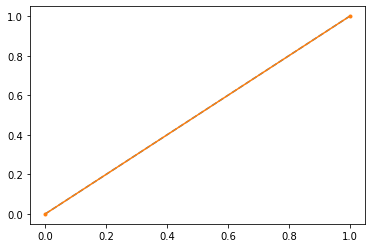

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**AUC and ROC for the test data**

AUC: 0.500


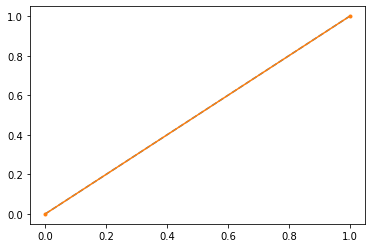

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**Confusion Matrix for the training data**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(train_labels, ytrain_predict)

array([[  0, 409],
       [  0, 504]])

In [ ]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.552026286966046

In [ ]:
print((0+504)/(0+409+0+504))

0.552026286966046


In [ ]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       409
           1       0.55      1.00      0.71       504

    accuracy                           0.55       913
   macro avg       0.28      0.50      0.36       913
weighted avg       0.30      0.55      0.39       913



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion Matrix for test data**

In [ ]:
confusion_matrix(test_labels, ytest_predict)

array([[  0, 205],
       [  0, 187]])

In [ ]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.4770408163265306

In [ ]:
print((0+187)/(0+205+0+187))

0.4770408163265306


In [ ]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.48      1.00      0.65       187

    accuracy                           0.48       392
   macro avg       0.24      0.50      0.32       392
weighted avg       0.23      0.48      0.31       392



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

**Conclusion**

Accuracy of training data is 55%
Accuracy of testing data is 48%


AUC of training and testing data is the same as 50%
Accuracy, AUC, Precision  and Recall of test data is almost inline with training data.

This proves that no over fitting and under fitting has happened, and overall the model is good.

The important variables are Wife's age, Standard-of-living index, Number of children ever born, Husband's occupation, Wife's education.
